In [1]:
import pandas as pd


In [4]:
data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col=0)

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
data.shape

(200, 4)

Visualizing with seaborn


In [9]:
import seaborn as sns

In [10]:
%matplotlib inline

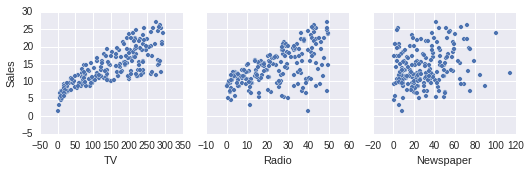

In [14]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

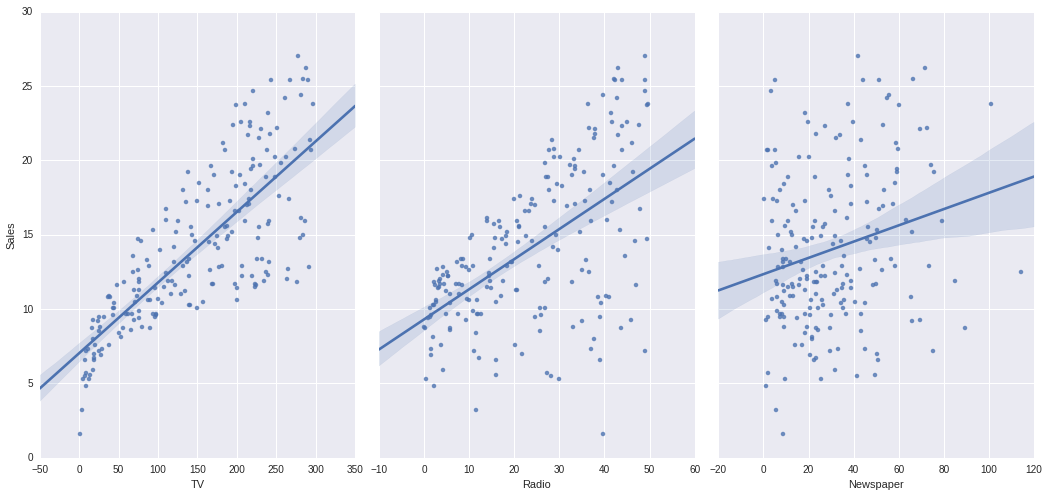

In [13]:
#Adding a line of best fit in 95% confidence band
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales', size=7, aspect=0.7, kind='reg') 

# Preparing the data set for pandas

In [17]:
# Create the list of feature columns
feature_cols = ['TV','Radio','Newspaper']

# Use the list to select a subset of original data set
X = data[feature_cols]



In [18]:
#Eqiuvalent command to perform the above in one line
X=data[['TV','Radio','Newspaper']]

In [19]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [20]:
print X.shape
print type(X)

(200, 3)
<class 'pandas.core.frame.DataFrame'>


In [22]:
y = data['Sales']

In [23]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [24]:
print y.shape
print type(y)

(200,)
<class 'pandas.core.series.Series'>


# Using Train test split

In [25]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)

In [28]:
print X_train.shape
print X_test.shape

(150, 3)
(50, 3)


In [29]:
print y_train.shape
print y_test.shape

(150,)
(50,)


# Using Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print linear_reg.intercept_
print linear_reg.coef_

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


therefore, y = 2.88 + 0.047 * TV + 0.179 * Radio + 0.003 * Newspaper

In [32]:
zip(feature_cols,linear_reg.coef_)

[('TV', 0.046564567874150253),
 ('Radio', 0.17915812245088841),
 ('Newspaper', 0.0034504647111804204)]

In [33]:
y_pred = linear_reg.predict(X_test)

Calculating the accuracy using true and predicted metrics

In [37]:
true =[100,50,30,20]
pred =[90,50,50,30]

In [38]:
from sklearn import metrics
print metrics.mean_absolute_error(true,pred)

10.0


In [39]:
print metrics.mean_squared_error(true,pred)

150.0


 Root mean squared error

In [40]:
import numpy as np
print np.sqrt(metrics.mean_squared_error(true,pred))

12.2474487139


RMSE for sales predcition

In [43]:
print np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.40465142303


# Remove Newspaper as it is a weak feature in sales prediction

In [44]:
X = data[['TV','Radio']]

In [45]:
y = data['Sales']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)

In [47]:
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
y_pred = linear_reg.predict(X_test)

In [49]:
print np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.38790346994
